<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0623_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
path='/content/drive/MyDrive/python_basic/data/bike_train.csv'

In [4]:
df=pd.read_csv(path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df['datetime']=pd.to_datetime(df['datetime'])
df['year']=df['datetime'].apply(lambda x:x.year)
df['month']=df['datetime'].apply(lambda x:x.month)
df['day']=df['datetime'].apply(lambda x:x.day)
df['hour']=df['datetime'].apply(lambda x:x.hour)



In [9]:
df=df.drop(['datetime','casual','registered'],axis=1)


In [10]:
data=df.drop('count',axis=1)
label=df['count']

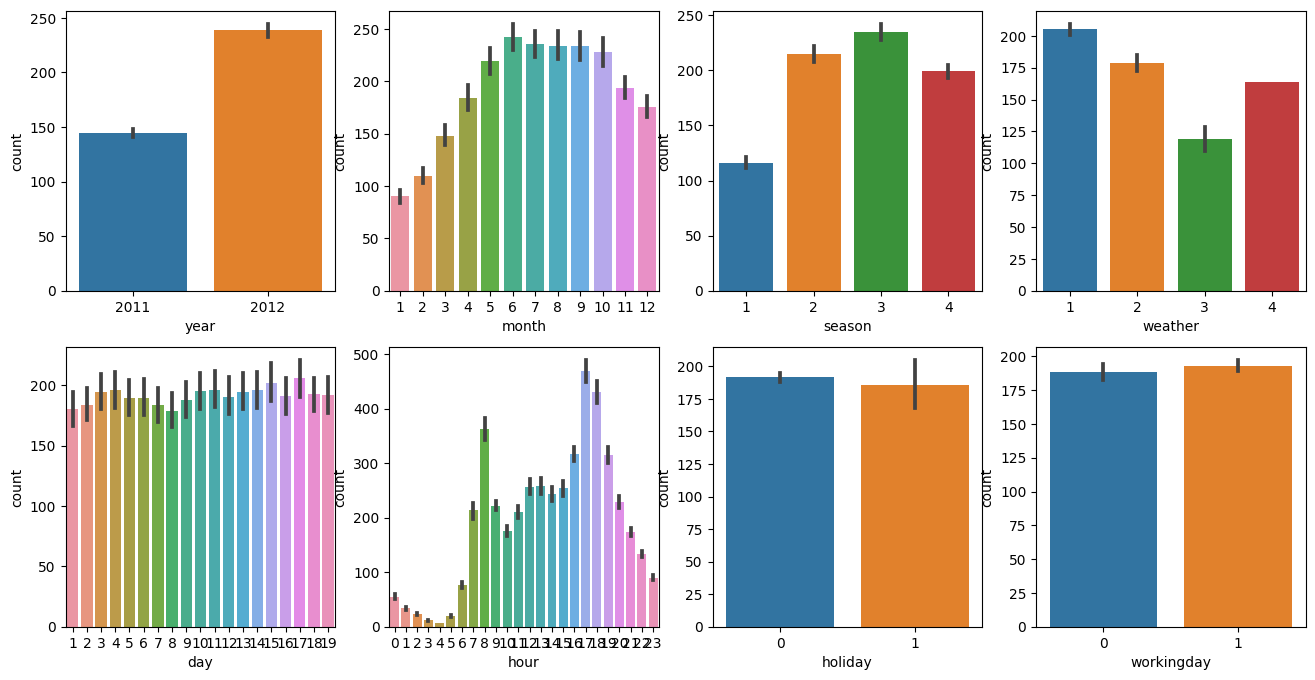

In [15]:
_,axes = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
features = ['year','month','season','weather','day','hour','holiday','workingday']
for i,feature in enumerate(features):
    r=int(i/4)
    c=i%4
    sns.barplot(x=feature,y='count',data=df,ax=axes[r][c])
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    se=(log_y-log_pred)**2
    return np.sqrt(np.mean(se))

In [19]:
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [21]:
def evaluate_regr(y,pred):
    rv1=rmsle(y,pred)
    rv2=rmse(y,pred)
    rv3=mean_absolute_error(y,pred)
    rv4=r2_score(y,pred)
    print(f'RMSLE:{rv1:.3f} RMSE:{rv2:.3f} MAE:{rv3:.3f} r2:{rv4:.3f}')

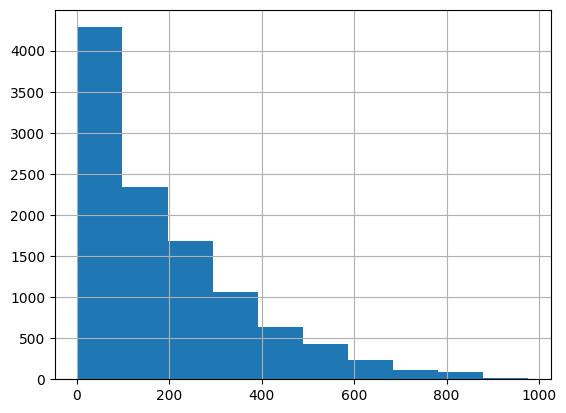

In [22]:
label.hist()
plt.show()

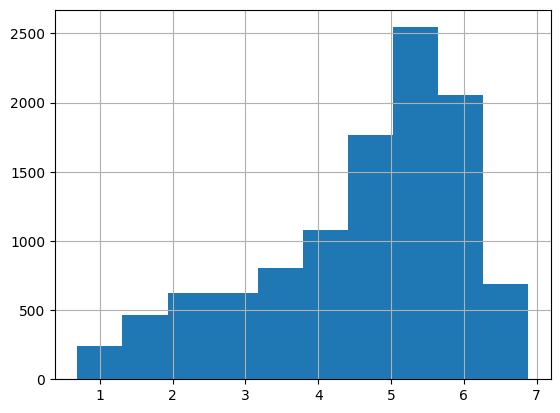

In [23]:
label_log=np.log1p(label)
label_log.hist()
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
x_train,x_test,y_train,y_test=train_test_split(data,label)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:1.193 RMSE:145.008 MAE:107.662 r2:0.391


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [28]:
x_train,x_test,y_train,y_test=train_test_split(data,label_log)

In [29]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:0.226 RMSE:1.000 MAE:0.782 r2:0.485


In [30]:
pred_exp=np.expm1(pred)
pred_yt=np.expm1(y_test)
evaluate_regr(pred_exp,pred_yt)

RMSLE:1.000 RMSE:158.322 MAE:105.257 r2:-0.273


In [32]:
print(model.coef_)

[-0.03573508 -0.09589161 -0.09073982 -0.01006955  0.00374655  0.03876747
 -0.01497574  0.00468833  0.42638768  0.0711735   0.00358539  0.09850342]


In [33]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [36]:
mms=MinMaxScaler()
mdata=mms.fit_transform(data)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(mdata,label)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:1.198 RMSE:140.221 MAE:103.739 r2:0.397


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [39]:
model.coef_

array([ -16.61644529,   -8.31593072,    1.08312117,  -12.39172959,
        105.66696075,  169.5246752 , -209.47164278,   31.53429074,
         81.0802786 ,  104.18333535,    4.46864275,  175.87491138])

In [40]:
mms=MinMaxScaler()
mdata=mms.fit_transform(data)
x_train,x_test,y_train,y_test=train_test_split(mdata,label_log)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:0.231 RMSE:1.019 MAE:0.793 r2:0.477


In [41]:
ocs=['year','month','day','hour','holiday','workingday','season','weather']
data2=pd.get_dummies(data,columns=ocs)
data2


,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [44]:
x_train,x_test,y_train,y_test=train_test_split(data2,label)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:0.840 RMSE:101.173 MAE:75.291 r2:0.688


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [47]:
x_train,x_test,y_train,y_test=train_test_split(data2,label_log)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
evaluate_regr(y_test,pred)

pred_exp=np.expm1(pred)
pred_yt=np.expm1(y_test)
evaluate_regr(pred_yt,pred_exp)

RMSLE:0.137 RMSE:0.580 MAE:0.430 r2:0.830
RMSLE:0.580 RMSE:95.032 MAE:60.748 r2:0.721


In [51]:
x_train,x_test,y_train,y_test=train_test_split(data2,label)

aps=[0,0.1,0.01,0.001,1,5,10,100]
for a in aps:
    model=Ridge(alpha=a)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print('alpha:',a)
    evaluate_regr(y_test,pred)

alpha: 0
RMSLE:0.849 RMSE:100.983 MAE:75.662 r2:0.686
alpha: 0.1
RMSLE:0.845 RMSE:100.976 MAE:75.559 r2:0.686
alpha: 0.01
RMSLE:0.847 RMSE:100.976 MAE:75.560 r2:0.686
alpha: 0.001


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


RMSLE:0.847 RMSE:100.976 MAE:75.560 r2:0.686
alpha: 1
RMSLE:0.856 RMSE:100.980 MAE:75.546 r2:0.686
alpha: 5
RMSLE:0.845 RMSE:101.017 MAE:75.506 r2:0.686
alpha: 10
RMSLE:0.853 RMSE:101.098 MAE:75.501 r2:0.685
alpha: 100
RMSLE:0.962 RMSE:105.680 MAE:78.942 r2:0.656


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [57]:
x_train,x_test,y_train,y_test=train_test_split(data2,label)
m1 = DecisionTreeRegressor()
m2 = RandomForestRegressor(n_estimators=500)
m3 = GradientBoostingRegressor(n_estimators=500)
m4 = XGBRegressor(n_estimators=500)
m5 = LGBMRegressor(n_estimators=500)
models = [m1,m2,m3,m4,m5]
for model in models:
  print(model.__class__.__name__)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  evaluate_regr(y_test,pred)

DecisionTreeRegressor
RMSLE:0.571 RMSE:74.496 MAE:44.079 r2:0.833
RandomForestRegressor
RMSLE:0.494 RMSE:52.685 MAE:33.478 r2:0.916
GradientBoostingRegressor


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


RMSLE:0.576 RMSE:58.189 MAE:40.535 r2:0.898
XGBRegressor


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


RMSLE:0.508 RMSE:46.905 MAE:30.947 r2:0.934
LGBMRegressor
RMSLE:0.516 RMSE:44.295 MAE:29.628 r2:0.941


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [59]:
params={'num_leaves':[5,10,30,100],
        'max_depth':[3,5,10,15,-1],
        'min_child_samples':[10,20,100,1000]}


In [62]:
model=LGBMRegressor(n_estimators=500)
gs=GridSearchCV(model,param_grid=params,cv=5)
gs.fit(x_train,y_train)
pred = gs.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:0.494 RMSE:44.264 MAE:29.811 r2:0.941


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [64]:
gs.best_params_

{'max_depth': 15, 'min_child_samples': 20, 'num_leaves': 30}

In [66]:
params={'max_leaves':[5,10,30,100,0],
        'max_depth':[3,5,10,15,30],}

In [68]:
model=XGBRegressor(n_estimators=500)
gs=GridSearchCV(model,param_grid=params,cv=5)
gs.fit(x_train,y_train)
pred = gs.predict(x_test)
evaluate_regr(y_test,pred)

RMSLE:0.551 RMSE:48.318 MAE:33.343 r2:0.930


<ipython-input-18-2d0011f2288d>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)
